<a href="https://colab.research.google.com/github/Anku0210/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/NETFLIX movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2990,s2991,Movie,Indiana Jones and the Kingdom of the Crystal S...,Steven Spielberg,"Harrison Ford, Cate Blanchett, Karen Allen, Ra...",United States,"January 1, 2019",2008,PG-13,123 min,"Action & Adventure, Children & Family Movies, ...",Indiana Jones is drawn into a Russian plot to ...
4620,s4621,Movie,Once a Gangster,Felix Chong,"Ekin Cheng, Jordan Chan, Alex Fong, Michelle Y...",Hong Kong,"December 1, 2018",2010,TV-MA,95 min,"Action & Adventure, Comedies, International Mo...",Two former triads are tapped to run in an elec...
5492,s5493,Movie,Senna,Asif Kapadia,"Ayrton Senna, Alain Prost, Frank Williams","United Kingdom, France, United States","October 1, 2019",2010,PG-13,106 min,"Documentaries, International Movies, Sports Mo...",This fast-paced documentary profiles Ayrton Se...
3547,s3548,Movie,Lavell Crawford: Can a Brother Get Some Love?,Michael Drumm,Lavell Crawford,United States,"August 2, 2016",2011,TV-MA,81 min,Stand-Up Comedy,"""Last Comic Standing"" runner-up Lavell Crawfor..."
1965,s1966,Movie,El silencio es bienvenido,Gabriela García Rivas,"Eileen Yáñez, Jorge Luis Moreno, Daniela Newto...",Mexico,"March 20, 2020",2017,TV-14,95 min,"Dramas, Independent Movies, International Movies",As a teen languishes during a spiritless road ...


In [5]:
data.shape

(7787, 12)

In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

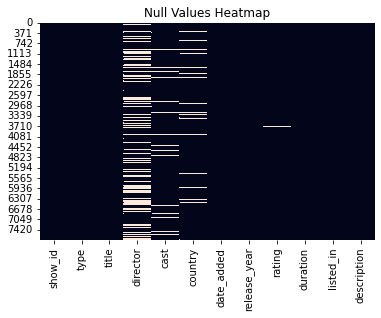

In [8]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [9]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
netflix = data.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
